# <center> "Human Learning" with Iris Data

<img src = "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">




Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline #This code allows the plots to be displayed directly in the notebook instead of opening a separate window.


UsageError: unrecognized arguments: # bu kod sayesinde grafikler notebookta gösterilebilir grafikler için ayrı bir pencere açılmaz.


## Task 1

In [2]:
# read the iris data into a pandas DataFrame, including column names

iris = pd.read_csv("iris.csv")
type(iris)

pandas.core.frame.DataFrame

## Task 2

In [ ]:
# gather basic information


In [3]:
iris.head() # the first 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.tail() # the last 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
iris.shape # in total, 150 rows 5 columns 

(150, 5)

In [6]:
iris.describe() # Basic Descriptive Statistics for every numerical columns

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.isnull().sum() #missing data check 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
iris.info() # Informations about variable types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.dtypes # only variable types check

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [10]:
iris.count() # non-missing value counts

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [17]:
numeric = iris.select_dtypes(include=[float, int]) #selecting only numerical variables

# Correlation Matrix
correlation_matrix = numeric.corr()

print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


In [18]:
iris["sepal_length"].idxmax() # ID of maximum value for sepal_length

131

In [19]:
iris["sepal_length"].idxmin() # ID of minimum value 

13

In [20]:
iris["sepal_length"].min() # minimum value

4.3

In [21]:
iris["sepal_length"].max() # maximum value

7.9

In [ ]:
## Task 3

In [ ]:
# use groupby to look for differences between the species


In [23]:
iris.groupby("species").sum() # Sum of values of other variables for each species

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,170.9,73.2,12.2
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [24]:
iris.groupby("species").mean() # mean of values of other variables for each species

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [26]:
iris.groupby("species").median() # medians of values of other variables for each species

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [34]:
iris.groupby("species").std() # standard deviations of values of other variables for each species

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.381024,0.173511,0.107210
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


In [38]:
iris.groupby("species").min() # minimum values of other variebles for each species

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.3,2.3,1.0,0.1
versicolor,4.9,2.0,3.0,1.0
virginica,4.9,2.2,4.5,1.4


In [39]:
iris.groupby("species").max() # maximum values of other variables for each species

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [40]:
iris.groupby("species").idxmax() # ID of min values of other variables for each species

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,14,15,24,43
versicolor,50,85,83,70
virginica,131,117,118,100


In [41]:
iris.groupby("species").corr() # Correlations between every pair of variables for each species

sepal_length  sepal_width  petal_length  petal_width
species                                                                      
setosa     sepal_length      1.000000     0.746780      0.263874     0.279092
           sepal_width       0.746780     1.000000      0.176695     0.279973
           petal_length      0.263874     0.176695      1.000000     0.306308
           petal_width       0.279092     0.279973      0.306308     1.000000
versicolor sepal_length      1.000000     0.525911      0.754049     0.546461
           sepal_width       0.525911     1.000000      0.560522     0.663999
           petal_length      0.754049     0.560522      1.000000     0.786668
           petal_width       0.546461     0.663999      0.786668     1.000000
virginica  sepal_length      1.000000     0.457228      0.864225     0.281108
           sepal_width       0.457228     1.000000      0.401045     0.537728
           petal_length      0.864225     0.401045      1.000000     0.322108
           petal_width       0.281108     0.537728      0.322108     1.000000

In [42]:
iris.groupby("species").nunique() # numbers of unique values of variables for each species

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,15,16,9,6
versicolor,21,14,19,9
virginica,21,13,20,12


##  Data  Visualization

In [50]:
# use plotting to look for differences between the species


In [ ]:
#Sepal Length for Species

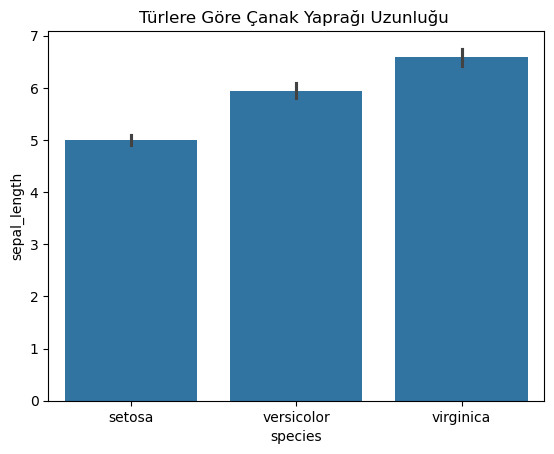

In [53]:
sns.barplot(x="species", y="sepal_length", data=iris)
plt.title("Türlere Göre Çanak Yaprağı Uzunluğu ")
plt.show()

In [ ]:
#Species Distribution

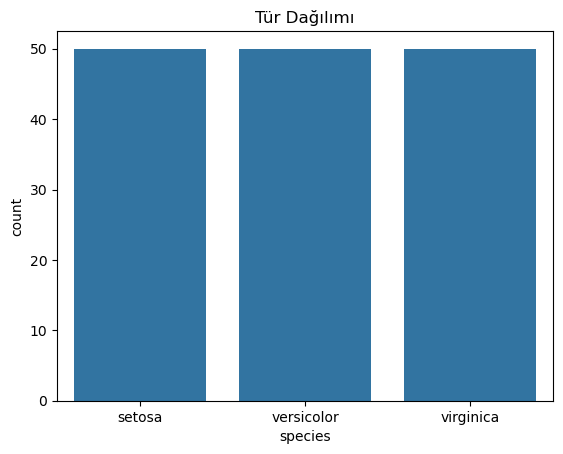

In [52]:
sns.countplot(x="species", data=iris)
plt.title("Tür Dağılımı")
plt.show()

In [ ]:
# Petal Distribution For Species

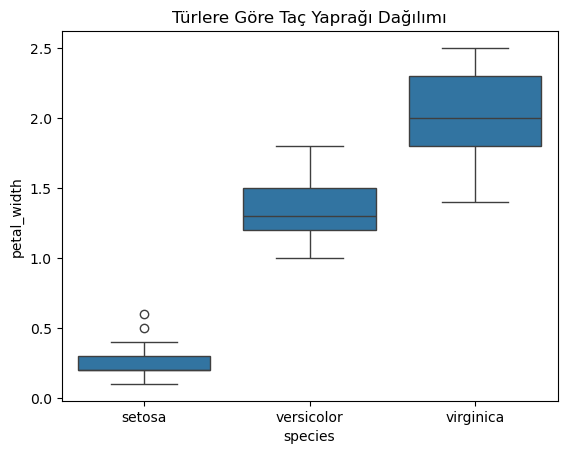

In [54]:
sns.boxplot(x="species", y="petal_width", data=iris)
plt.title("Türlere Göre Taç Yaprağı Dağılımı")
plt.show()

In [58]:
# map species to a numeric value so that plots can be colored by category
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris['species_numeric'] = iris['species'].map(species_map)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_numeric
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


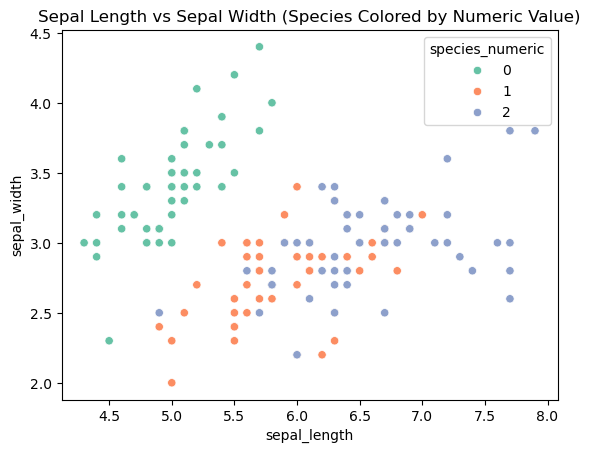

In [61]:
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species_numeric", palette="Set2", data=iris)
plt.title("Sepal Length vs Sepal Width (Species Colored by Numeric Value)")
plt.show()

In [ ]:
## Task 4

In [68]:
iris[iris["species"]=="setosa"]["sepal_length"].max() # maximum sepal length of Setosa species.

5.8

In [69]:
iris[iris["species"]=="setosa"]["sepal_length"].min() # minimum sepal length of Setosa species

4.3

In [70]:
iris[iris["species"]=="versicolor"]["sepal_length"].max() # maximum sepal length of Versicolor species

7.0

In [71]:
iris[iris["species"]=="versicolor"]["sepal_length"].min() # minimum sepal length of Versicolor Species

4.9

In [72]:
iris[iris["species"]=="virginica"]["sepal_length"].max() # maximum sepal length of Virginica Species

7.9

In [73]:
iris[iris["species"]=="virginica"]["sepal_length"].min() # minimum sepal length of Virginica Species

4.9

## Bonus

In [ ]:
# define function that accepts a row of data and returns a predicted species


In [80]:
def predict_species(row):
    sepal_length = row['sepal_length']
    
    # Kural 1: Setosa
    if sepal_length < 4.9 :
        return 'setosa'
    # Kural 2: Versicolor
    elif 5.8 < sepal_length <= 7.0 :
        return 'versicolor'
    # Kural 3: Virginica
    elif sepal_length > 7.0 :
        return 'virginica'
    else:
        return 'unknown'

iris['predicted_species'] = iris.apply(predict_species, axis=1)

# Sonuçları göster
print(iris[['sepal_length', 'species', 'predicted_species']].sample(20))

     sepal_length     species predicted_species
59            5.2  versicolor           unknown
6             4.6      setosa            setosa
25            5.0      setosa           unknown
17            5.1      setosa           unknown
137           6.4   virginica        versicolor
138           6.0   virginica        versicolor
82            5.8  versicolor           unknown
105           7.6   virginica         virginica
122           7.7   virginica         virginica
56            6.3  versicolor        versicolor
48            5.3      setosa           unknown
143           6.8   virginica        versicolor
136           6.3   virginica        versicolor
45            4.8      setosa            setosa
4             5.0      setosa           unknown
134           6.1   virginica        versicolor
95            5.7  versicolor           unknown
13            4.3      setosa            setosa
28            5.2      setosa           unknown
57            4.9  versicolor           